In [93]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
from matplotlib import pyplot as plt

In [67]:
df = pd.read_csv("50yr earthquake data peninsular India.csv")

In [68]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-05-26T05:09:10.629Z,23.2123,86.8925,10.00,4.7,mb,NaN,99.0,6.208,0.66,...,2019-06-22T10:15:08.897Z,"18km WSW of Bankura, India",earthquake,6.5,1.9,0.066,69.0,reviewed,us,us
1,2019-02-12T01:32:27.310Z,14.3974,85.7300,10.00,4.9,mb,NaN,78.0,7.358,0.83,...,2019-05-01T22:00:34.040Z,Bay of Bengal,earthquake,5.4,1.6,0.068,68.0,reviewed,us,us
2,2018-09-01T18:09:55.250Z,23.4903,82.4460,10.00,4.7,mb,NaN,78.0,9.928,0.97,...,2018-11-07T18:37:08.040Z,"28km NNW of Baikunthpur, India",earthquake,9.2,1.9,0.061,81.0,reviewed,us,us
3,2018-08-28T13:03:27.670Z,22.6926,87.7938,10.00,4.5,mb,NaN,93.0,4.685,0.60,...,2018-11-07T18:37:03.040Z,"8km ENE of Ghatal, India",earthquake,9.1,1.9,0.139,15.0,reviewed,us,us
4,2014-05-21T16:21:54.350Z,18.2012,88.0376,47.23,6.0,mww,NaN,38.0,5.590,0.63,...,2015-01-28T16:02:10.607Z,"276km SE of Konarka, India",earthquake,NaN,3.7,NaN,NaN,reviewed,us,us


In [69]:
df['year'] = df.time.apply(lambda x : x.split(sep = '-')[0])
df['month'] = df.time.apply(lambda x : x.split(sep = '-')[1])

In [70]:
df2 = pd.DataFrame(df.groupby(['year','month']).count().loc[:,'latitude'])
df2.rename({'latitude' : 'no_earthquakes'}, axis = 1, inplace = True)
df2.reset_index(inplace=True)

In [74]:
df2.groupby('year').mean().mean()

no_earthquakes    1.316146
dtype: float64

lambda = 1.31, e = 2.718281828459045
x = ( 0,1, 2, 3, 4, 5, 6, 7, 8, 9 )

In [127]:

rate = df2.groupby('year').mean().mean()
x = np.arange(0,10,1)
Poisson = poisson.pmf(x,rate)

In [128]:
Poisson

array([2.68166873e-01, 3.52946712e-01, 2.32264672e-01, 1.01898060e-01,
       3.35281768e-02, 8.82559405e-03, 1.93596147e-03, 3.64001089e-04,
       5.98848146e-05, 8.75746103e-06])

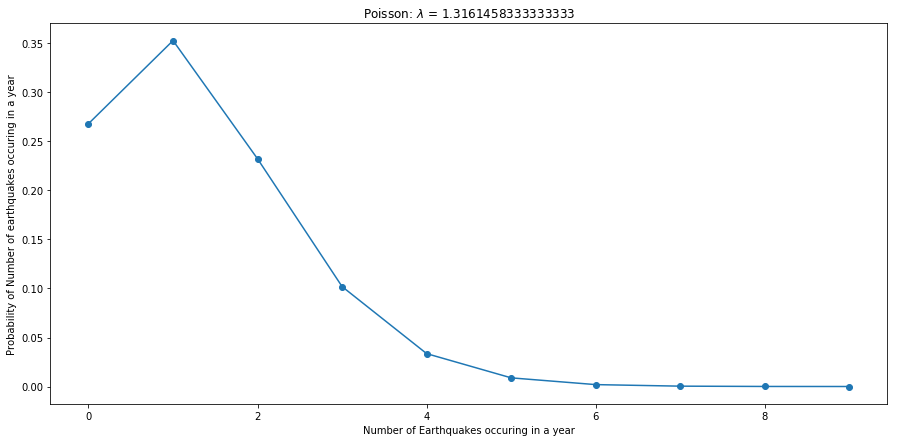

In [129]:
plt.figure(figsize= (15,7))
plt.plot(x,Poisson,'o-')
plt.title(f'Poisson: $\lambda$ = {rate[0]}')
plt.xlabel('Number of Earthquakes occuring in a year')
plt.ylabel('Probability of Number of earthquakes occuring in a year')
plt.show()